In [3]:
d = [open('/usr/userfs/s/sjb577/scratch/output/continuedFractionOpt24hours.job.o204206.'+str(i), 'r') for i in range(1, 9)]
d+=[open('/usr/userfs/s/sjb577/scratch/output/cfInterstingPoly.job.o247936.'+str(i), 'r') for i in range(1, 3)]
import csv
all_data = {}
i=0
polys = []

for c in d:
    polys.append(c.readline())

In [4]:
for c in d:
    all_data[polys[i]]= {'cf':[],'sum':[],'mean':[],'double mean':[]}
    reader = csv.reader(c)
    for row in reader:
        if len(row)<4:
            break
        all_data[polys[i]]['cf'].append(int(row[0]))
        all_data[polys[i]]['sum'].append(row[1])
        all_data[polys[i]]['mean'].append(float(row[2]))
        all_data[polys[i]]['double mean'].append(float(row[3]))
    i+=1

In [5]:
for c in d:
    c.close()

In [6]:
for p in polys:
    print(len(all_data[p]['cf']))

2920956
2878823
2890295
2919504
2913889
2914385
1327728
1082512
2884050
2908641


In [23]:
maxes={p:[] for p in polys}
prevMax = {p:0 for p in polys}
for p in polys:
    for cf in all_data[p]['cf']:
        prevMax[p] = max(cf, prevMax[p])
        maxes[p].append(prevMax[p])

In [7]:
%pylab inline
pylab.rcParams['figure.figsize'] = (15.0, 8.0)


Populating the interactive namespace from numpy and matplotlib


In [8]:
def latex_poly(p):
    p = p.split()
    coeffs = p[3:]
    text = coeffs[0][1:-1]  + 'x^0'
    for i in range(1,len(coeffs)):
        text =  ' + ' +coeffs[i][:-1]+'x^' + str(i) + text
    return "$"+ text[2:] +"$"

In [9]:
def plot_alldata(s, polynomials = polys, start=0):
    fig = pyplot.figure()
    ax = fig.add_subplot(111)
    pyplot.rc('text', usetex=True)
    pyplot.rc('font', family='serif')
    plots= []
    for p in polynomials:
        ax.plot(all_data[p][s][start:], label=latex_poly(p))
    pyplot.legend(loc='upper right');
    ax.figure.show()

In [20]:
def plot_maxes(polynomials = polys, start=0):
    fig = pyplot.figure()
    ax = fig.add_subplot(111)
    pyplot.rc('text', usetex=True)
    pyplot.rc('font', family='serif')
    plots= []
    for p in polynomials:
        ax.plot(maxes[p][start:], label=latex_poly(p))
    pyplot.legend(loc='upper right');
    ax.figure.show()

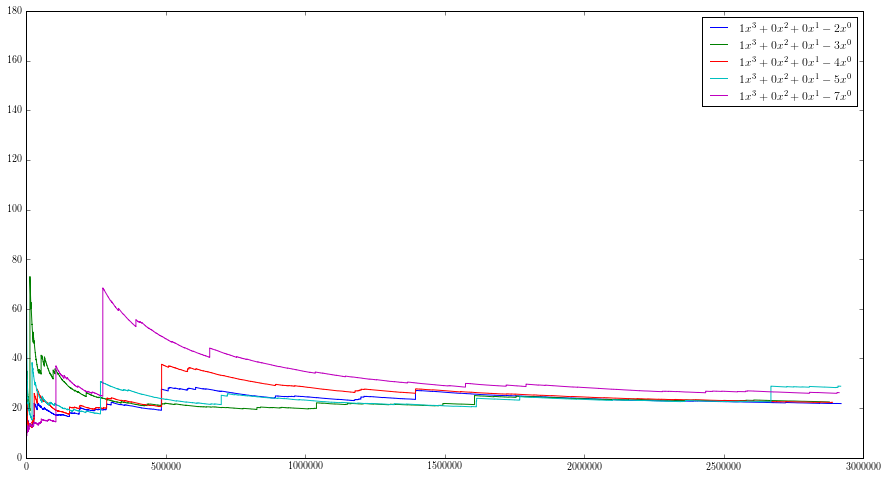

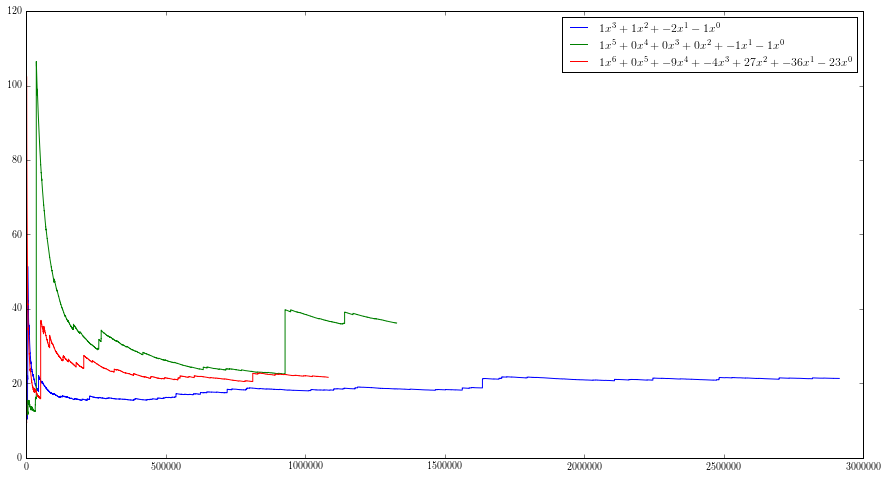

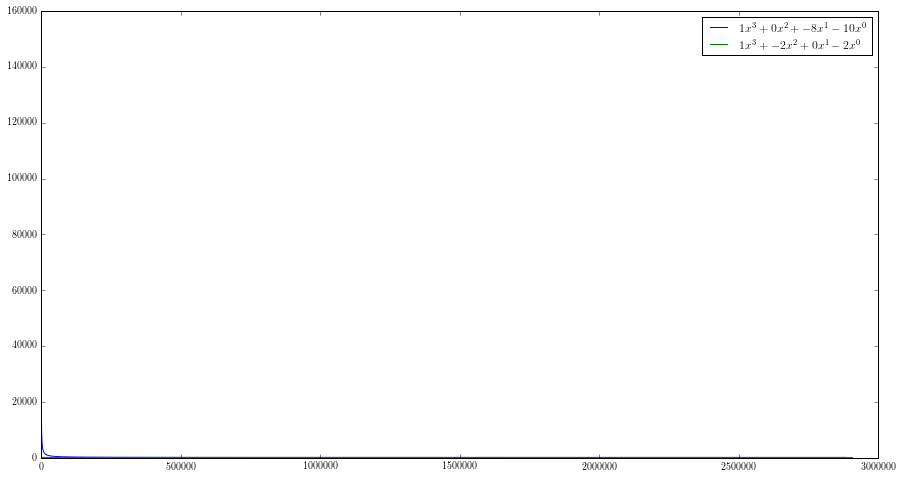

In [26]:
plot_alldata('mean', polynomials=polys[:5], start=10)
plot_alldata('mean', polynomials=polys[5:8], start=10)
plot_alldata('mean', polynomials=polys[8:], start=10)

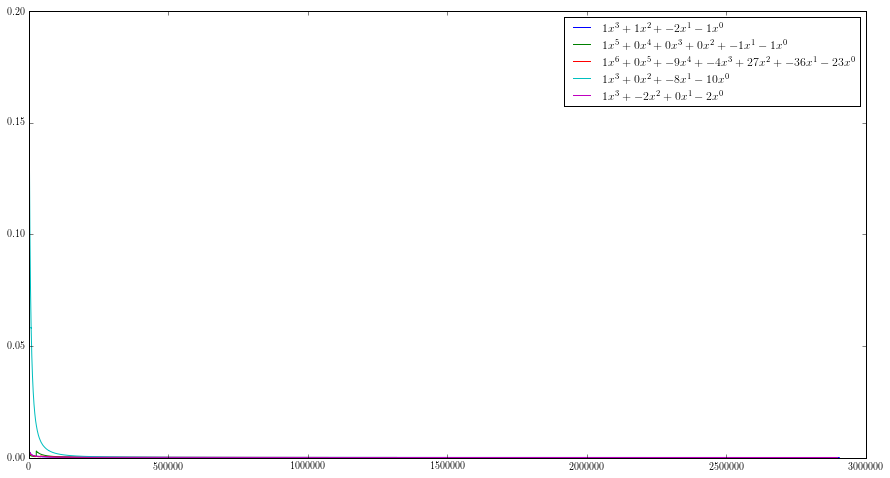

In [11]:
plot_alldata('double mean', polynomials=polys[5:],start=10000)

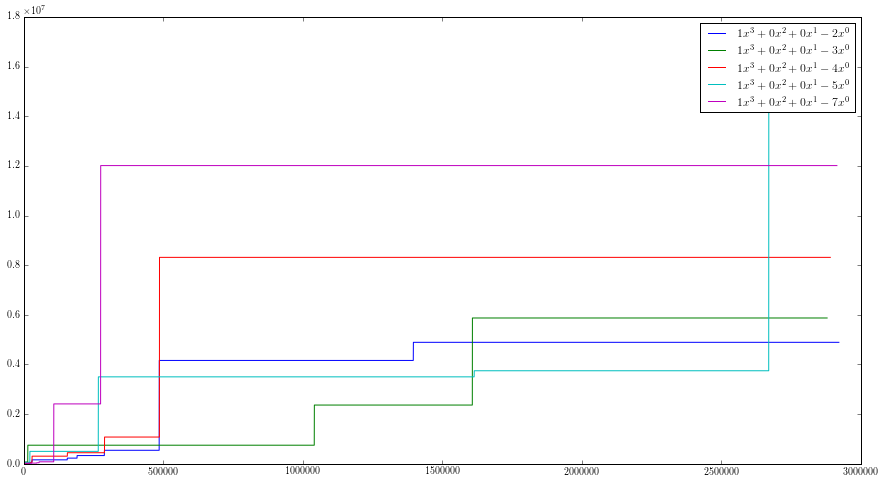

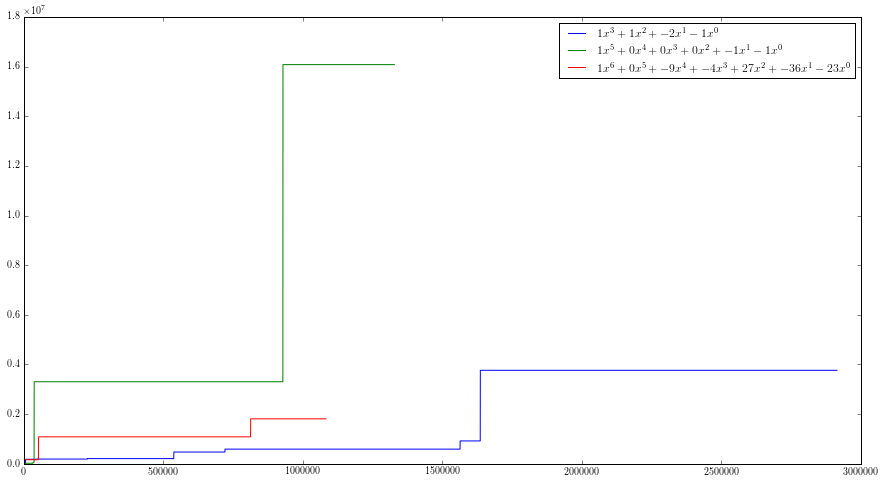

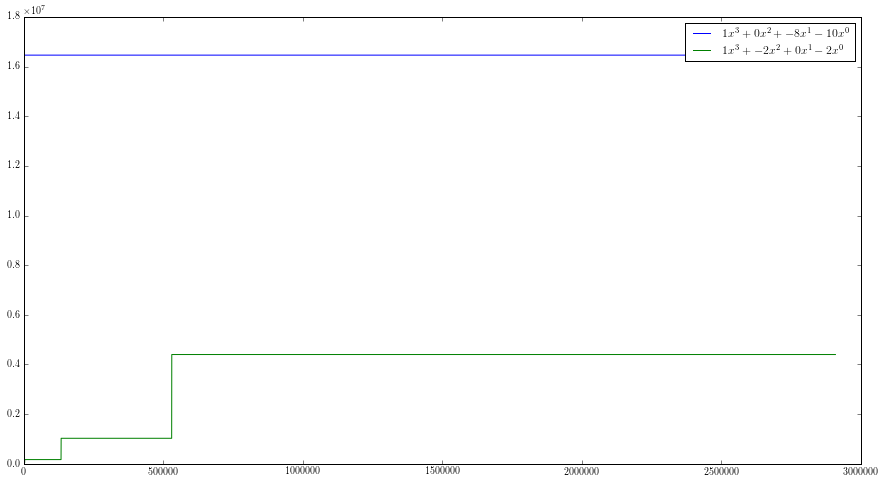

In [24]:
plot_maxes( polynomials=polys[:5], start=10)
plot_maxes( polynomials=polys[5:8], start=10)
plot_maxes( polynomials=polys[8:], start=10)

In [12]:
sympy.poly?

Object `sympy.poly` not found.


In [13]:
import sympy, re, pprint
x = sympy.symbols('x')
ps = []
for p in polys:
    p = re.sub("[^0-9\-]", ",",p).split(",")
    coeffs = [int(c) for c in p if c!='']
    counter = 0
    y = sympy.poly(0,x)
    for c in coeffs:
        y += sympy.poly(c*x**counter, x)
        counter +=1
    ps.append(y)

pprint.pprint([(p,sympy.discriminant(p)) for p in ps])

[(Poly(x**3 - 2, x, domain='ZZ'), -108),
 (Poly(x**3 - 3, x, domain='ZZ'), -243),
 (Poly(x**3 - 4, x, domain='ZZ'), -432),
 (Poly(x**3 - 5, x, domain='ZZ'), -675),
 (Poly(x**3 - 7, x, domain='ZZ'), -1323),
 (Poly(x**3 + x**2 - 2*x - 1, x, domain='ZZ'), 49),
 (Poly(x**5 - x - 1, x, domain='ZZ'), 2869),
 (Poly(x**6 - 9*x**4 - 4*x**3 + 27*x**2 - 36*x - 23, x, domain='ZZ'),
  67941730271232),
 (Poly(x**3 - 8*x - 10, x, domain='ZZ'), -652),
 (Poly(x**3 - 2*x**2 - 2, x, domain='ZZ'), -172)]


In [14]:
from collections import Counter
c = [Counter(all_data[polys[i]]['cf']) for i in range(8)]

In [15]:
for i in range(8):
    print(latex_poly(polys[i]),c[i][1]*1.0/len(all_data[polys[i]]['cf']),
          )

('$ 1x^3 + 0x^2 + 0x^1-2x^0$', 0.41494770890078453)
('$ 1x^3 + 0x^2 + 0x^1-3x^0$', 0.41503802074667323)
('$ 1x^3 + 0x^2 + 0x^1-4x^0$', 0.41539739023179295)
('$ 1x^3 + 0x^2 + 0x^1-5x^0$', 0.4154116589667286)
('$ 1x^3 + 0x^2 + 0x^1-7x^0$', 0.4149543788387272)
('$ 1x^3 + 1x^2 + -2x^1-1x^0$', 0.4148168481514968)
('$ 1x^5 + 0x^4 + 0x^3 + 0x^2 + -1x^1-1x^0$', 0.4152303785112613)
('$ 1x^6 + 0x^5 + -9x^4 + -4x^3 + 27x^2 + -36x^1-23x^0$', 0.4153699912795424)
